<a href="https://colab.research.google.com/github/Ramyavenkatrajulu/Data-Science-Projects/blob/main/House_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Prediction Project**

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import seaborn as sns 
import matplotlib.pyplot as plt

In [126]:
dataset = pd.read_csv('/content/train-chennai-sale.csv') #read the dataset

In [127]:
dataset.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004    4/5/2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909    4/2/2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226   5/10/2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [129]:
dataset.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

In [130]:
dataset.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [131]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [132]:
dataset.drop_duplicates()


PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004    4/5/2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909    4/2/2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226   5/10/2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598    3/1/2011             51        1.0   
7105  P10000   Velachery      1897    8/4/2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787    3/8/2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [133]:
dataset.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [134]:
df = pd.DataFrame(dataset)
df.head(10)

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004    4/5/2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909    4/2/2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226   5/10/2009             84        1.0   
5  P00219    Chrompet      1220   11/9/2014             36        2.0   
6  P09105    Chrompet      1167    5/4/2007            137        1.0   
7  P09679   Velachery      1847  13-03-2006            176        3.0   
8  P03377    Chrompet       771    6/4/2011            175        1.0   
9  P09623   Velachery      1635  22-06-2006             74        2.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL     STREET  \
0         1.0       3  AbNormal        Yes  ...        AllPub      Paved   
1         1.0       5  AbNormal         No  ...        AllPub     Gravel   
2         1.0       3  AbNormal        Yes  ...           ELO     Gravel   
3         2.0       5    Family         No  ...       NoSewr       Paved   
4         1.0       3  AbNormal        Yes  ...        AllPub     Gravel   
5         1.0       4   Partial         No  ...        NoSeWa  No Access   
6         1.0       3   Partial         No  ...        AllPub  No Access   
7         2.0       5    Family         No  ...        AllPub     Gravel   
8         1.0       2   AdjLand         No  ...       NoSewr       Paved   
9         1.0       4  AbNormal         No  ...           ELO  No Access   

  MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
0      A      4.0         3.9         4.9       4.330   380000  144400   
1     RH      4.9         4.2         2.5       3.765   760122  304049   
2     RL      4.1         3.8         2.2       3.090   421094   92114   
3      I      4.7         3.9         3.6       4.010   356321   77042   
4      C      3.0         2.5         4.1       3.290   237000   74063   
5     RH      4.5         2.6         3.1       3.320   409027  198316   
6     RL      3.6         2.1         2.5       2.670   263152   33955   
7     RM      2.4         4.5         2.1       3.260   604809  235204   
8     RM      2.9         3.7         4.0       3.550   257578   33236   
9      I      3.1         3.1         3.3       3.160   323346  121255   

   SALES_PRICE  
0      7600000  
1     21717770  
2     13159200  
3      9630290  
4      7406250  
5     12394750  
6      8488790  
7     16800250  
8      8308970  
9      8083650  

[10 rows x 22 columns]

PRT_ID is not required for this model. so I removed from the dataset

In [135]:
df = df.iloc[:,1:]
df


AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     Karapakkam      1004    4/5/2011            131        1.0         1.0   
1     Anna Nagar      1986  19-12-2006             26        2.0         1.0   
2          Adyar       909    4/2/2012             70        1.0         1.0   
3      Velachery      1855  13-03-2010             14        3.0         2.0   
4     Karapakkam      1226   5/10/2009             84        1.0         1.0   
...          ...       ...         ...            ...        ...         ...   
7104  Karapakkam       598    3/1/2011             51        1.0         1.0   
7105   Velachery      1897    8/4/2004             52        3.0         2.0   
7106   Velachery      1614  25-08-2006            152        2.0         1.0   
7107  Karapakkam       787    3/8/2009             40        1.0         1.0   
7108   Velachery      1896  13-07-2005            156        3.0         2.0   

      N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD  ... UTILITY_AVAIL  \
0          3     AbNormal        Yes  15-05-1967  ...        AllPub   
1          5     AbNormal         No  22-12-1995  ...        AllPub   
2          3     AbNormal        Yes    9/2/1992  ...           ELO   
3          5       Family         No  18-03-1988  ...       NoSewr    
4          3     AbNormal        Yes  13-10-1979  ...        AllPub   
...      ...          ...        ...         ...  ...           ...   
7104       2      AdjLand         No  15-01-1962  ...           ELO   
7105       5       Family        Yes   11/4/1995  ...        NoSeWa   
7106       4  Normal Sale         No    1/9/1978  ...        NoSeWa   
7107       2      Partial        Yes   11/8/1977  ...           ELO   
7108       5      Partial        Yes  24-07-1961  ...           ELO   

         STREET MZZONE QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0         Paved      A      4.0          3.9         4.9       4.330   380000   
1        Gravel     RH      4.9          4.2         2.5       3.765   760122   
2        Gravel     RL      4.1          3.8         2.2       3.090   421094   
3         Paved      I      4.7          3.9         3.6       4.010   356321   
4        Gravel      C      3.0          2.5         4.1       3.290   237000   
...         ...    ...      ...          ...         ...         ...      ...   
7104  No Access     RM      3.0          2.2         2.4       2.520   208767   
7105  No Access     RH      3.6          4.5         3.3       3.920   346191   
7106     Gravel      I      4.3          4.2         2.9       3.840   317354   
7107      Paved     RL      4.6          3.8         4.1       4.160   425350   
7108      Paved      I      3.1          3.5         4.3       3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 21 columns]

**To find the Age of the building:**

In [136]:
df['DATE_SALE']= pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']= pd.to_datetime(df['DATE_BUILD'])

# create a new column 'AGE_BUILD' to find the age of the Building
df['AGE_BUILD'] = df['DATE_SALE'] - df['DATE_BUILD']

#So we need drop the columns 'DATE_SALE' and 'DATE_BUILD'
df = df.drop(['DATE_BUILD','DATE_SALE'], axis=1)
df

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     Karapakkam      1004            131        1.0         1.0       3   
1     Anna Nagar      1986             26        2.0         1.0       5   
2          Adyar       909             70        1.0         1.0       3   
3      Velachery      1855             14        3.0         2.0       5   
4     Karapakkam      1226             84        1.0         1.0       3   
...          ...       ...            ...        ...         ...     ...   
7104  Karapakkam       598             51        1.0         1.0       2   
7105   Velachery      1897             52        3.0         2.0       5   
7106   Velachery      1614            152        2.0         1.0       4   
7107  Karapakkam       787             40        1.0         1.0       2   
7108   Velachery      1896            156        3.0         2.0       5   

        SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL     STREET MZZONE  \
0        AbNormal        Yes  Commercial        AllPub      Paved      A   
1        AbNormal         No  Commercial        AllPub     Gravel     RH   
2        AbNormal        Yes  Commercial           ELO     Gravel     RL   
3          Family         No      Others       NoSewr       Paved      I   
4        AbNormal        Yes      Others        AllPub     Gravel      C   
...           ...        ...         ...           ...        ...    ...   
7104      AdjLand         No      Others           ELO  No Access     RM   
7105       Family        Yes      Others        NoSeWa  No Access     RH   
7106  Normal Sale         No       House        NoSeWa     Gravel      I   
7107      Partial        Yes  Commercial           ELO      Paved     RL   
7108      Partial        Yes      Others           ELO      Paved      I   

      QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
0          4.0          3.9         4.9       4.330   380000  144400   
1          4.9          4.2         2.5       3.765   760122  304049   
2          4.1          3.8         2.2       3.090   421094   92114   
3          4.7          3.9         3.6       4.010   356321   77042   
4          3.0          2.5         4.1       3.290   237000   74063   
...        ...          ...         ...         ...      ...     ...   
7104       3.0          2.2         2.4       2.520   208767  107060   
7105       3.6          4.5         3.3       3.920   346191  205551   
7106       4.3          4.2         2.9       3.840   317354  167028   
7107       4.6          3.8         4.1       4.160   425350  119098   
7108       3.1          3.5         4.3       3.640   349177   79812   

      SALES_PRICE  AGE_BUILD  
0         7600000 16031 days  
1        21717770  4015 days  
2        13159200  7152 days  
3         9630290  8030 days  
4         7406250 10802 days  
...           ...        ...  
7104      5353000 17942 days  
7105     10818480  3196 days  
7106      8351410 10455 days  
7107      8507000 11443 days  
7108      9976480 16060 days  

[7056 rows x 20 columns]

In [137]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'AGE_BUILD'],
      dtype='object')

In this dataset, we have some misspelled values in columns namely 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','SALE_COND' and 'AREA'. so we have to replace those values.

In [138]:
df1 = df.where(df['BUILDTYPE'] == 'Comercial')
df1.dropna(how='all')
df['BUILDTYPE'] = df['BUILDTYPE'].replace('Comercial','Commercial')
df['BUILDTYPE'] = df['BUILDTYPE'].replace('Other','Others')
df

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     Karapakkam      1004            131        1.0         1.0       3   
1     Anna Nagar      1986             26        2.0         1.0       5   
2          Adyar       909             70        1.0         1.0       3   
3      Velachery      1855             14        3.0         2.0       5   
4     Karapakkam      1226             84        1.0         1.0       3   
...          ...       ...            ...        ...         ...     ...   
7104  Karapakkam       598             51        1.0         1.0       2   
7105   Velachery      1897             52        3.0         2.0       5   
7106   Velachery      1614            152        2.0         1.0       4   
7107  Karapakkam       787             40        1.0         1.0       2   
7108   Velachery      1896            156        3.0         2.0       5   

        SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL     STREET MZZONE  \
0        AbNormal        Yes  Commercial        AllPub      Paved      A   
1        AbNormal         No  Commercial        AllPub     Gravel     RH   
2        AbNormal        Yes  Commercial           ELO     Gravel     RL   
3          Family         No      Others       NoSewr       Paved      I   
4        AbNormal        Yes      Others        AllPub     Gravel      C   
...           ...        ...         ...           ...        ...    ...   
7104      AdjLand         No      Others           ELO  No Access     RM   
7105       Family        Yes      Others        NoSeWa  No Access     RH   
7106  Normal Sale         No       House        NoSeWa     Gravel      I   
7107      Partial        Yes  Commercial           ELO      Paved     RL   
7108      Partial        Yes      Others           ELO      Paved      I   

      QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
0          4.0          3.9         4.9       4.330   380000  144400   
1          4.9          4.2         2.5       3.765   760122  304049   
2          4.1          3.8         2.2       3.090   421094   92114   
3          4.7          3.9         3.6       4.010   356321   77042   
4          3.0          2.5         4.1       3.290   237000   74063   
...        ...          ...         ...         ...      ...     ...   
7104       3.0          2.2         2.4       2.520   208767  107060   
7105       3.6          4.5         3.3       3.920   346191  205551   
7106       4.3          4.2         2.9       3.840   317354  167028   
7107       4.6          3.8         4.1       4.160   425350  119098   
7108       3.1          3.5         4.3       3.640   349177   79812   

      SALES_PRICE  AGE_BUILD  
0         7600000 16031 days  
1        21717770  4015 days  
2        13159200  7152 days  
3         9630290  8030 days  
4         7406250 10802 days  
...           ...        ...  
7104      5353000 17942 days  
7105     10818480  3196 days  
7106      8351410 10455 days  
7107      8507000 11443 days  
7108      9976480 16060 days  

[7056 rows x 20 columns]

In [139]:
df2 = df.where(df['UTILITY_AVAIL'] == 'All Pub')
df2.dropna(how='all')
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'All Pub':'AllPub','NoSewr':'NoSeWa', 'NoSewr ':'NoSeWa'})

In [140]:
df2 = df.where(df['STREET'] == 'NoAccess')
df2.dropna(how='all')
df['STREET'] = df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'})

In [141]:
df2 = df.where(df['SALE_COND'] == 'PartiaLl')
df2.dropna(how='all')
df['SALE_COND'].replace(['Ab Normal', 'Partiall', 'PartiaLl', 'Adj Land'],
                    ['AbNormal', 'Partial', 'Partial', 'AdjLand'], inplace=True)


In [142]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace('Noo','No')

In [143]:
df2 = df.where(df['AREA'] == 'Velchery')
df2.dropna(how='all')
df['AREA'] = df['AREA'].replace('Adyr','Adyar')
df['AREA'] = df['AREA'].replace('Ana Nagar','Anna Nagar')
df['AREA'] = df['AREA'].replace('Ann Nagar','Anna Nagar')
df['AREA'] = df['AREA'].replace('Chormpet','Chrompet')
df['AREA'] = df['AREA'].replace('Chrompt','Chrompet')
df['AREA'] = df['AREA'].replace('Chrmpet','Chrompet')
df['AREA'] = df['AREA'].replace('Karapakam','Karapakkam')
df['AREA'] = df['AREA'].replace('KKNagar','KK Nagar')
df['AREA'] = df['AREA'].replace('TNagar','T Nagar')
df['AREA'] = df['AREA'].replace('Velchery','Velachery')
df

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     Karapakkam      1004            131        1.0         1.0       3   
1     Anna Nagar      1986             26        2.0         1.0       5   
2          Adyar       909             70        1.0         1.0       3   
3      Velachery      1855             14        3.0         2.0       5   
4     Karapakkam      1226             84        1.0         1.0       3   
...          ...       ...            ...        ...         ...     ...   
7104  Karapakkam       598             51        1.0         1.0       2   
7105   Velachery      1897             52        3.0         2.0       5   
7106   Velachery      1614            152        2.0         1.0       4   
7107  Karapakkam       787             40        1.0         1.0       2   
7108   Velachery      1896            156        3.0         2.0       5   

        SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL     STREET MZZONE  \
0        AbNormal        Yes  Commercial        AllPub      Paved      A   
1        AbNormal         No  Commercial        AllPub     Gravel     RH   
2        AbNormal        Yes  Commercial           ELO     Gravel     RL   
3          Family         No      Others        NoSeWa      Paved      I   
4        AbNormal        Yes      Others        AllPub     Gravel      C   
...           ...        ...         ...           ...        ...    ...   
7104      AdjLand         No      Others           ELO  No Access     RM   
7105       Family        Yes      Others        NoSeWa  No Access     RH   
7106  Normal Sale         No       House        NoSeWa     Gravel      I   
7107      Partial        Yes  Commercial           ELO      Paved     RL   
7108      Partial        Yes      Others           ELO      Paved      I   

      QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
0          4.0          3.9         4.9       4.330   380000  144400   
1          4.9          4.2         2.5       3.765   760122  304049   
2          4.1          3.8         2.2       3.090   421094   92114   
3          4.7          3.9         3.6       4.010   356321   77042   
4          3.0          2.5         4.1       3.290   237000   74063   
...        ...          ...         ...         ...      ...     ...   
7104       3.0          2.2         2.4       2.520   208767  107060   
7105       3.6          4.5         3.3       3.920   346191  205551   
7106       4.3          4.2         2.9       3.840   317354  167028   
7107       4.6          3.8         4.1       4.160   425350  119098   
7108       3.1          3.5         4.3       3.640   349177   79812   

      SALES_PRICE  AGE_BUILD  
0         7600000 16031 days  
1        21717770  4015 days  
2        13159200  7152 days  
3         9630290  8030 days  
4         7406250 10802 days  
...           ...        ...  
7104      5353000 17942 days  
7105     10818480  3196 days  
7106      8351410 10455 days  
7107      8507000 11443 days  
7108      9976480 16060 days  

[7056 rows x 20 columns]

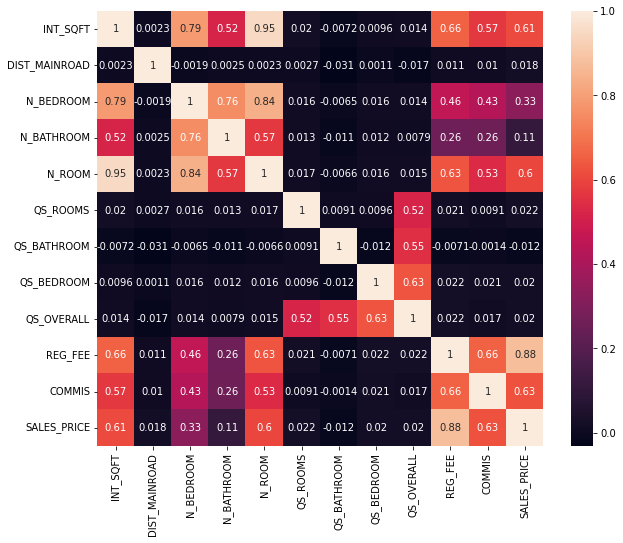

In [144]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True)
plt.show()

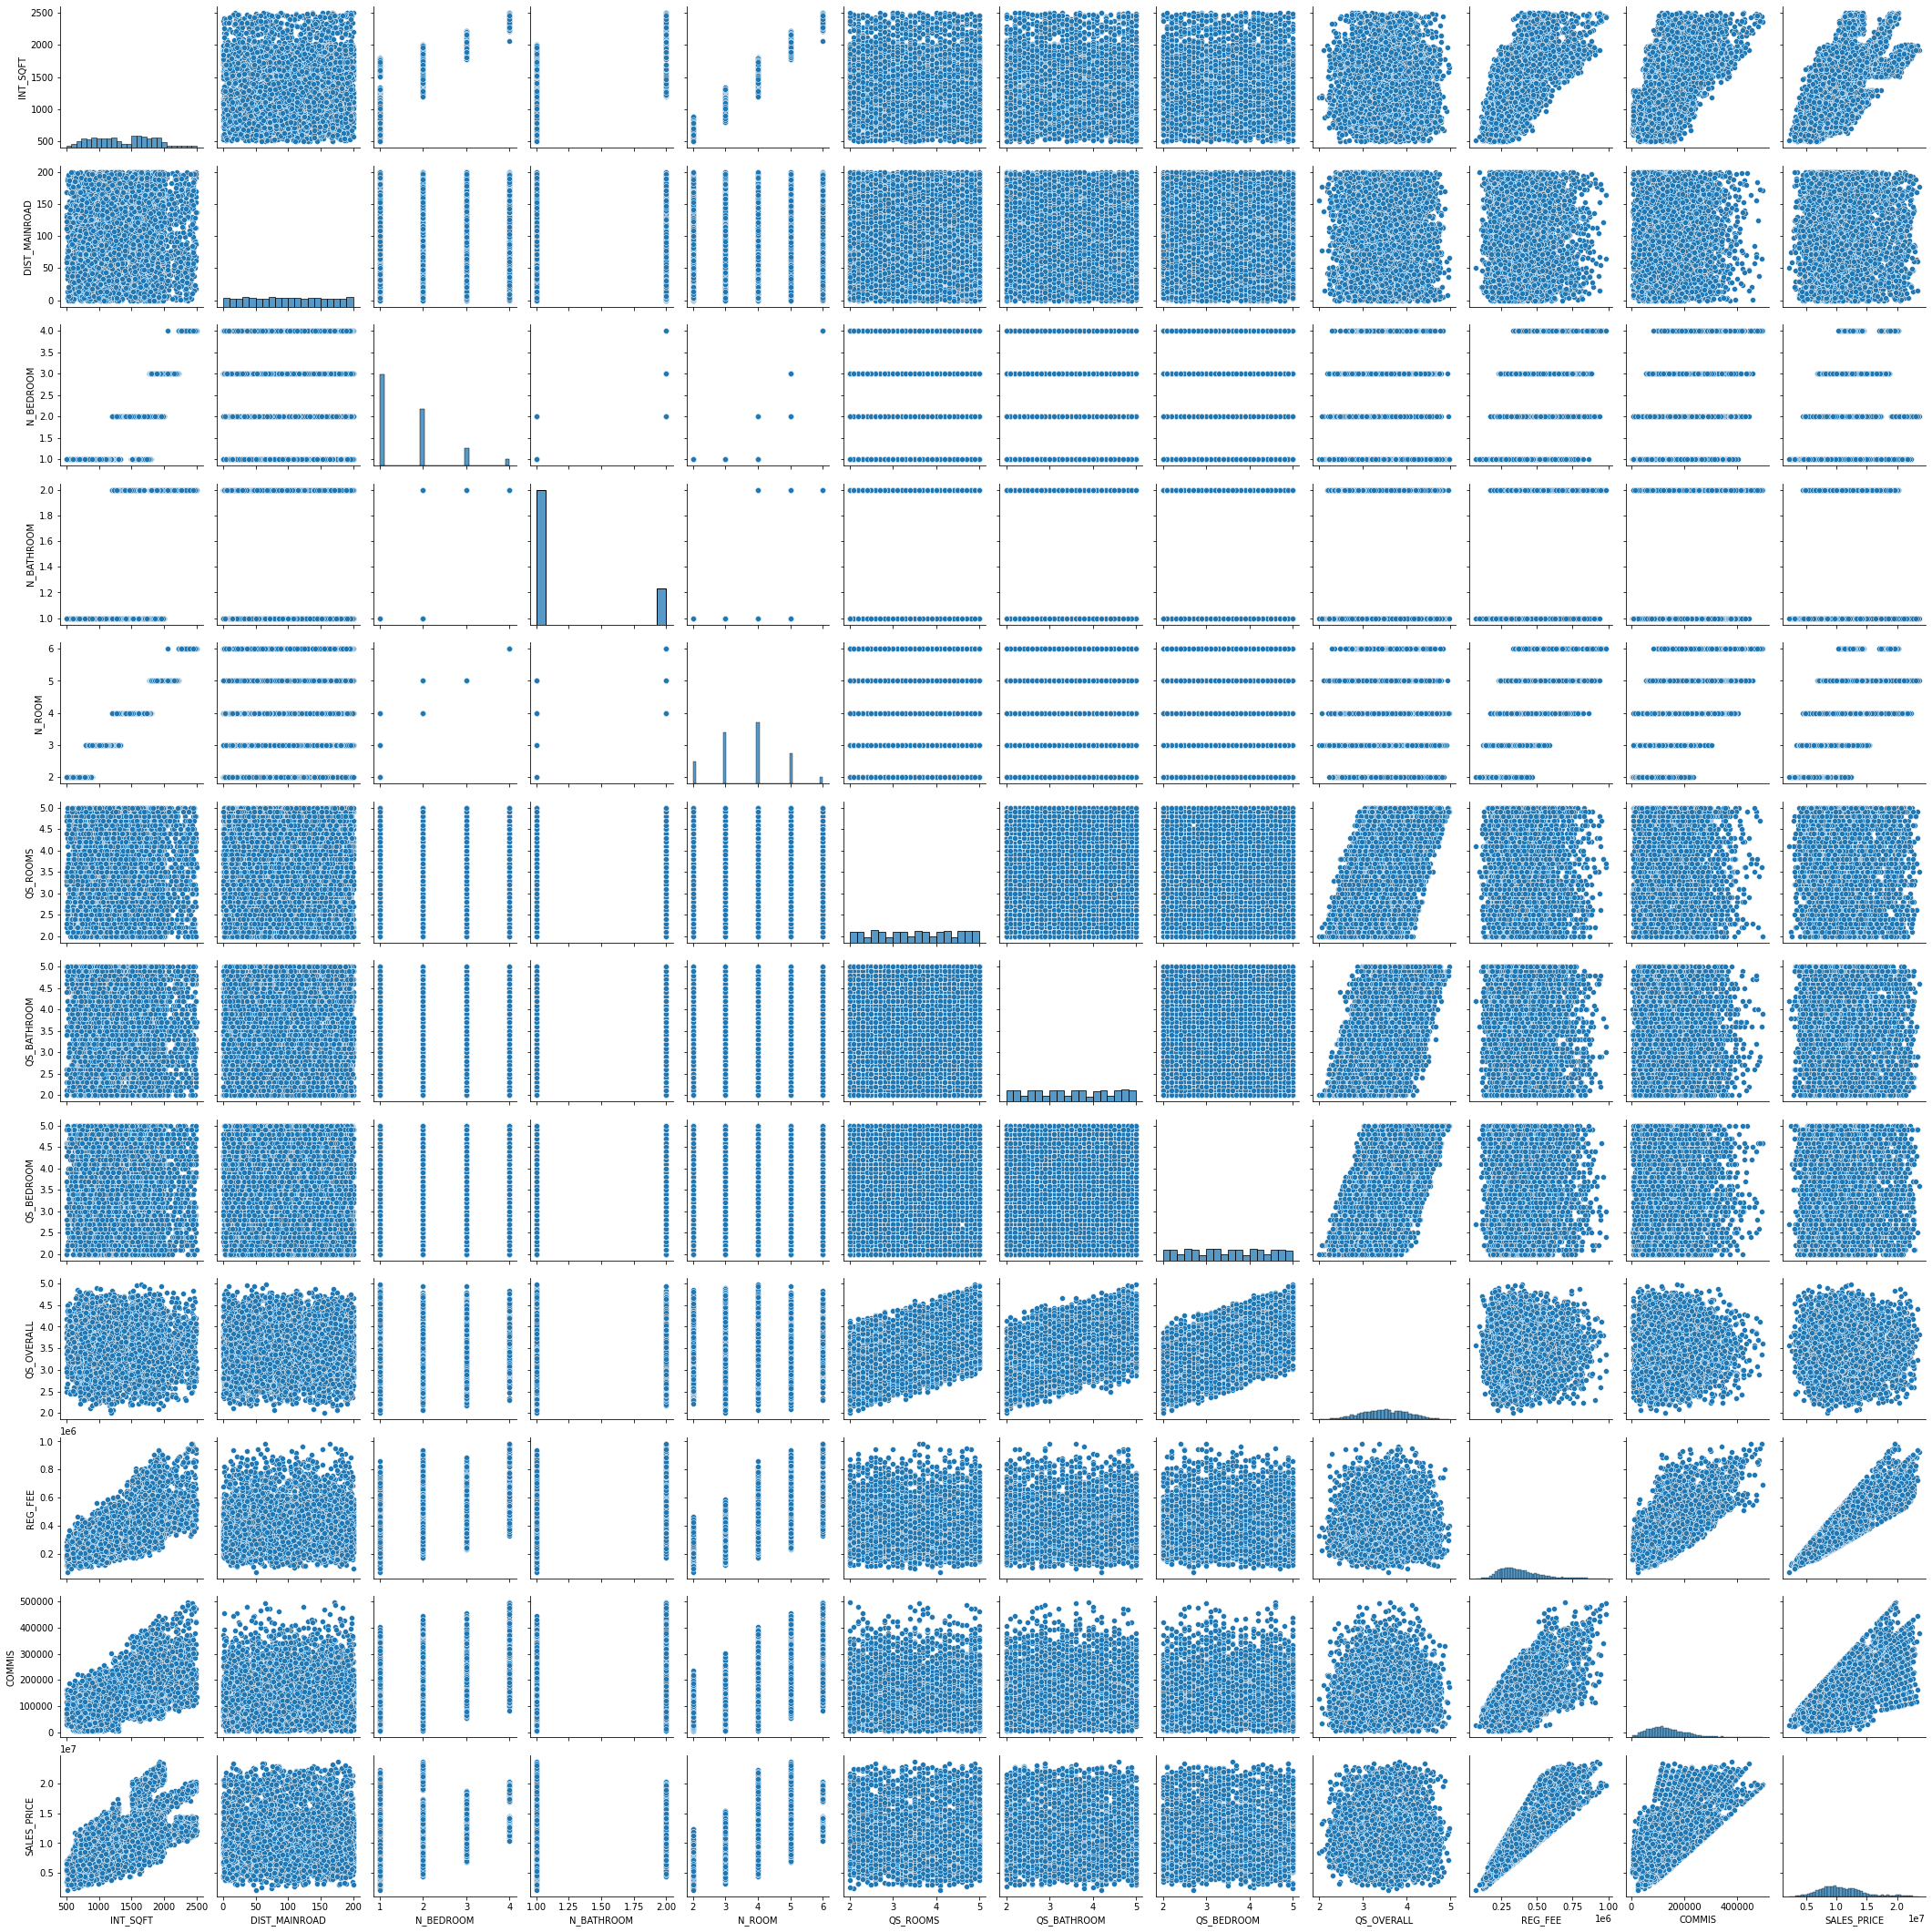

In [145]:
sns.pairplot(df)

**Changing Datatypes**

In [146]:
df['AGE_BUILD'] = df['AGE_BUILD'].astype('timedelta64[D]')

In [147]:
df['AGE_YEARS'] = df['AGE_BUILD']//365 

In [148]:
df = df.drop(['AGE_BUILD'], axis=1) # deleted the column 'AGE_BUILD'

In [149]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype('int32')
df['N_BATHROOM'] = df['N_BATHROOM'].astype('int32')

In [150]:
df['AGE_YEARS'] = df['AGE_YEARS'].astype('int')

In [151]:
df.head()

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0  Karapakkam      1004            131          1           1       3   
1  Anna Nagar      1986             26          2           1       5   
2       Adyar       909             70          1           1       3   
3   Velachery      1855             14          3           2       5   
4  Karapakkam      1226             84          1           1       3   

  SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others        NoSeWa   Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  \
0          3.9         4.9       4.330   380000  144400      7600000   
1          4.2         2.5       3.765   760122  304049     21717770   
2          3.8         2.2       3.090   421094   92114     13159200   
3          3.9         3.6       4.010   356321   77042      9630290   
4          2.5         4.1       3.290   237000   74063      7406250   

   AGE_YEARS  
0         43  
1         11  
2         19  
3         22  
4         29

  **Plots of** **categorical** **fields**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


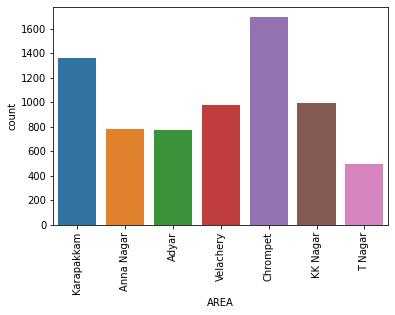

In [152]:
plt.xticks(rotation=90)
sns.countplot(df['AREA'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


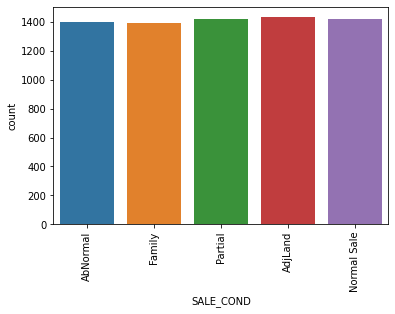

In [153]:
plt.xticks(rotation=90)
sns.countplot(df['SALE_COND'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


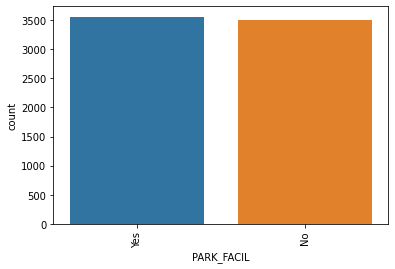

In [154]:
plt.xticks(rotation=90)
sns.countplot(df['PARK_FACIL'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


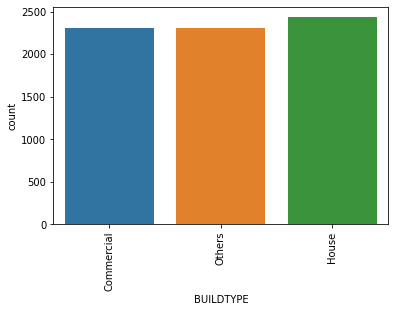

In [155]:
plt.xticks(rotation=90)
sns.countplot(df['BUILDTYPE'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


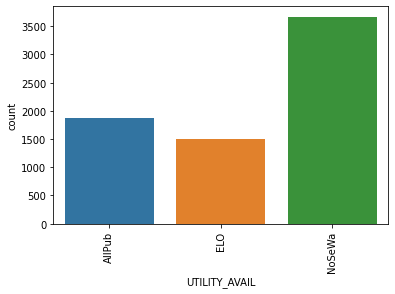

In [156]:
plt.xticks(rotation=90)
sns.countplot(df['UTILITY_AVAIL'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


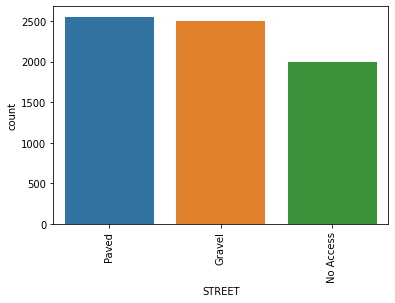

In [157]:
plt.xticks(rotation=90)
sns.countplot(df['STREET'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


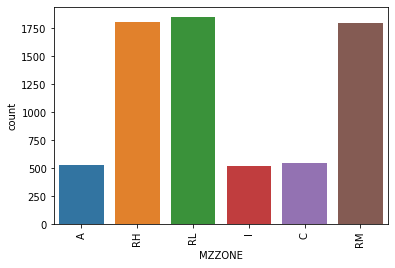

In [158]:
plt.xticks(rotation=90)
sns.countplot(df['MZZONE'])
plt.show()

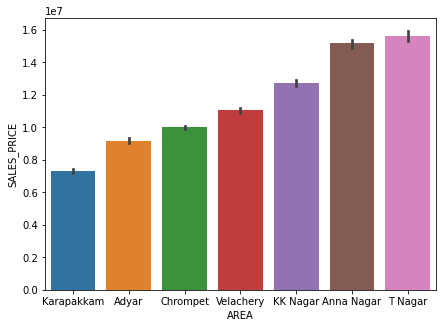

In [159]:
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
fig = plt.figure(figsize = (7,5))
sns.barplot(x='AREA', y='SALES_PRICE', data=df,order= area_order)
plt.show()

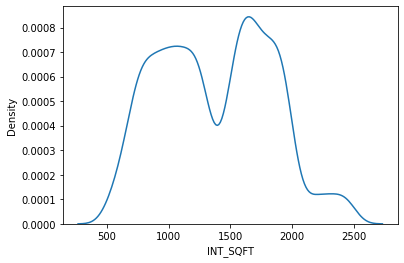

In [160]:
sns.kdeplot(df['INT_SQFT'])

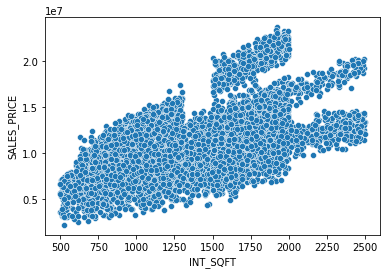

In [161]:
sns.scatterplot(x='INT_SQFT',y ='SALES_PRICE', data=df)

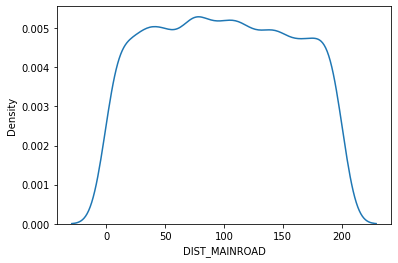

In [162]:
sns.kdeplot(df['DIST_MAINROAD'])

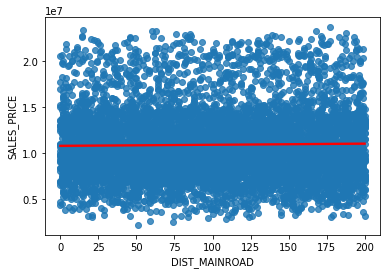

In [163]:
sns.regplot(x='DIST_MAINROAD',y ='SALES_PRICE', data=df, line_kws={"color": "red"})

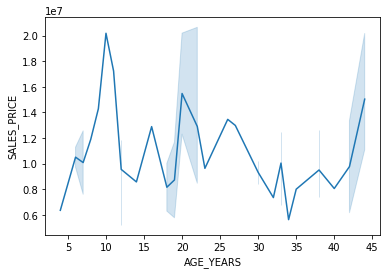

In [164]:
sns.lineplot(x='AGE_YEARS',y ='SALES_PRICE', data=df.sample(50))

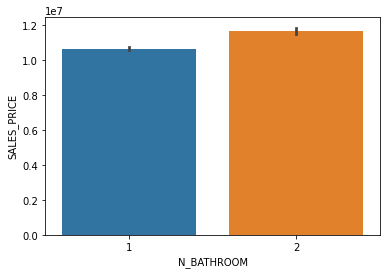

In [165]:
sns.barplot(x='N_BATHROOM', y ='SALES_PRICE', data=df)

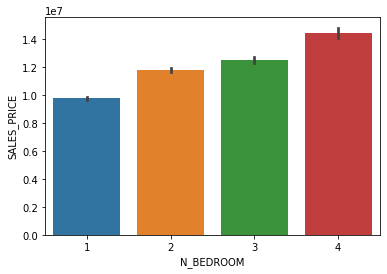

In [166]:
sns.barplot(x='N_BEDROOM', y ='SALES_PRICE', data=df)

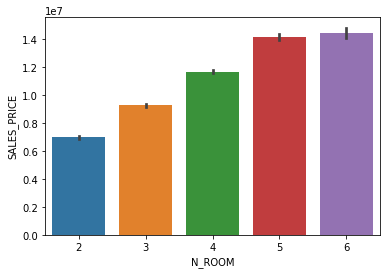

In [167]:
sns.barplot(x='N_ROOM', y ='SALES_PRICE', data=df)

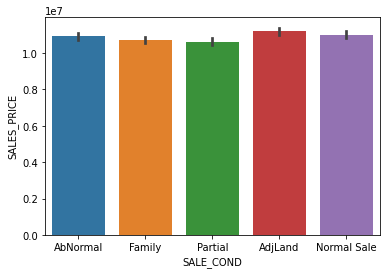

In [168]:
sns.barplot(x='SALE_COND', y ='SALES_PRICE', data=df)

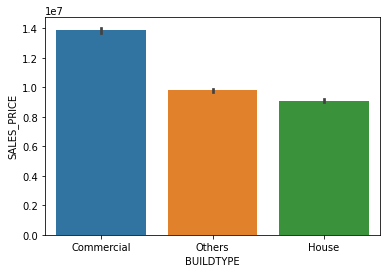

In [169]:
sns.barplot(x='BUILDTYPE', y ='SALES_PRICE', data=df)


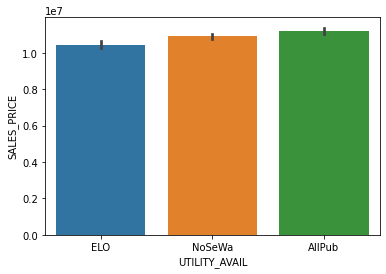

In [170]:
_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x='UTILITY_AVAIL', y ='SALES_PRICE', data=df, order=_order)

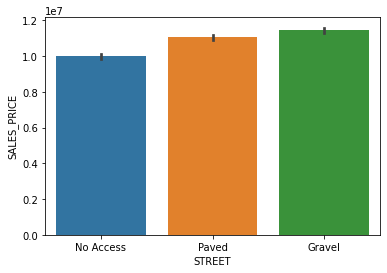

In [171]:
_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x='STREET', y ='SALES_PRICE', data=df, order=_order)

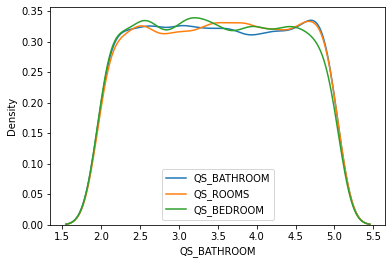

In [172]:
sns.kdeplot(df['QS_BATHROOM'],label='QS_BATHROOM')
sns.kdeplot(df['QS_ROOMS'],label= 'QS_ROOMS')
sns.kdeplot(df['QS_BEDROOM'],label='QS_BEDROOM')
plt.legend()
plt.show()

In [173]:
df[['QS_BATHROOM','QS_ROOMS','QS_BEDROOM']].describe()

QS_BATHROOM     QS_ROOMS   QS_BEDROOM
count  7056.000000  7056.000000  7056.000000
mean      3.505896     3.517177     3.485332
std       0.897644     0.892141     0.886814
min       2.000000     2.000000     2.000000
25%       2.700000     2.700000     2.700000
50%       3.500000     3.500000     3.500000
75%       4.300000     4.300000     4.300000
max       5.000000     5.000000     5.000000

From the above, I have noticed QS_ROOMS, QS_BATHROOM, QS_BEDROOM fields have same min,max,q1,q2 and q3 and they have similar means. They looks like redundant.Let's check their relations with sales price

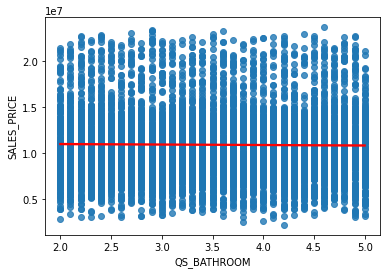

In [174]:
sns.regplot(x='QS_BATHROOM',y ='SALES_PRICE',data=df,line_kws={"color": "red"}) # same plot will be shown for both QS_ROOMS & QS_BEDROOM.

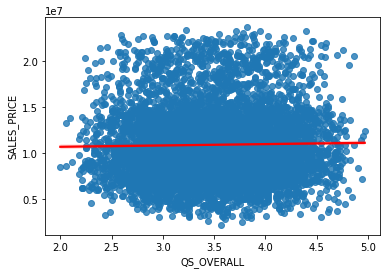

In [175]:
sns.regplot(x='QS_OVERALL',y ='SALES_PRICE',data=df,line_kws={"color": "red"})

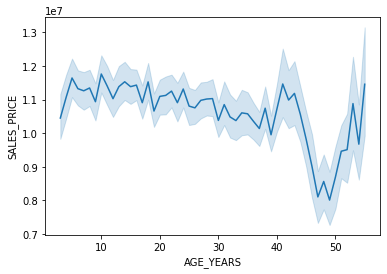

In [176]:
sns.lineplot(x='AGE_YEARS',y ='SALES_PRICE', data=df) #Sales price is seems to be decrease with increase in age.

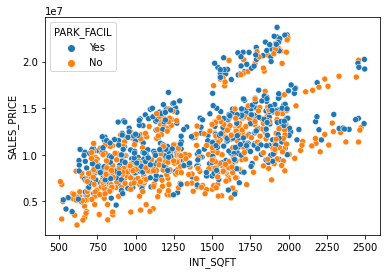

In [177]:
sns.scatterplot(x='INT_SQFT',y ='SALES_PRICE', hue='PARK_FACIL' ,data=df.sample(1000)) 


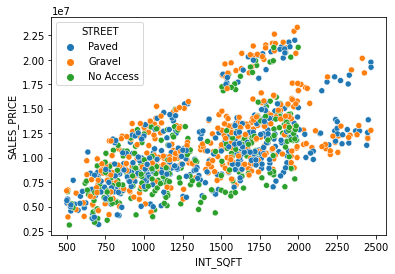

In [178]:
sns.scatterplot(x='INT_SQFT',y ='SALES_PRICE', hue='STREET' ,data=df.sample(1000))


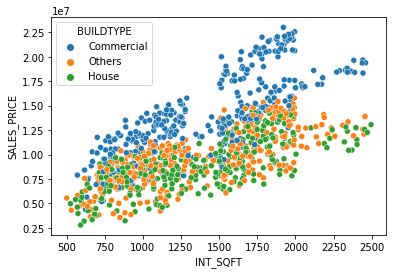

In [179]:
sns.scatterplot(x='INT_SQFT',y ='SALES_PRICE', hue='BUILDTYPE' ,data=df.sample(1000))


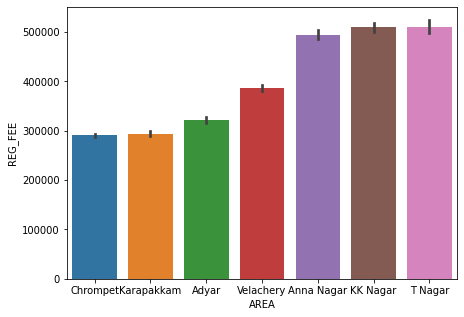

In [180]:
area_order = df.groupby('AREA')['REG_FEE'].mean().reset_index().sort_values('REG_FEE')['AREA']
fig = plt.figure(figsize = (7,5))
sns.barplot(x='AREA', y='REG_FEE', data=df,order= area_order)
plt.show()

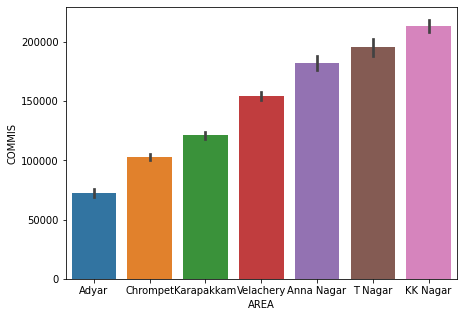

In [181]:
area_order = df.groupby('AREA')['COMMIS'].mean().reset_index().sort_values('COMMIS')['AREA']
fig = plt.figure(figsize = (7,5))
sns.barplot(x='AREA', y='COMMIS', data=df,order= area_order)
plt.show()

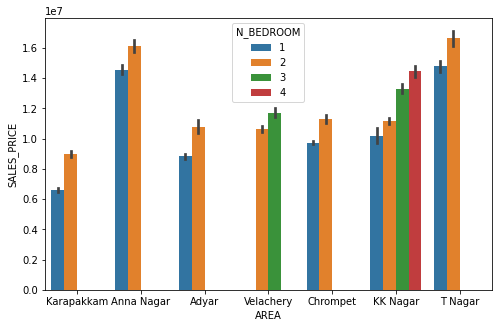

In [182]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x='AREA',y='SALES_PRICE' ,data=df, hue='N_BEDROOM')
plt.show()


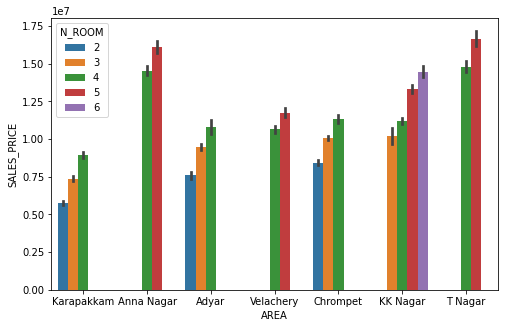

In [183]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x='AREA',y='SALES_PRICE' ,data=df, hue='N_ROOM')
plt.show()

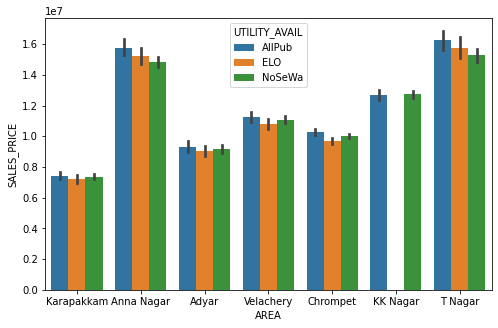

In [184]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x='AREA',y='SALES_PRICE' ,data=df, hue='UTILITY_AVAIL')
plt.show()

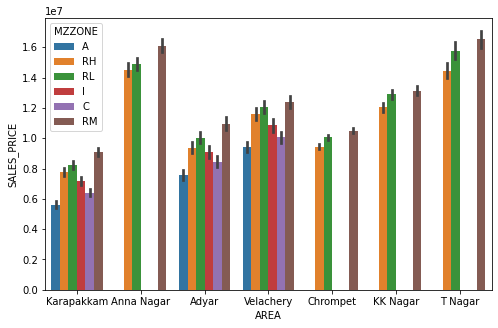

In [185]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x='AREA',y='SALES_PRICE' ,data=df, hue='MZZONE')
plt.show()

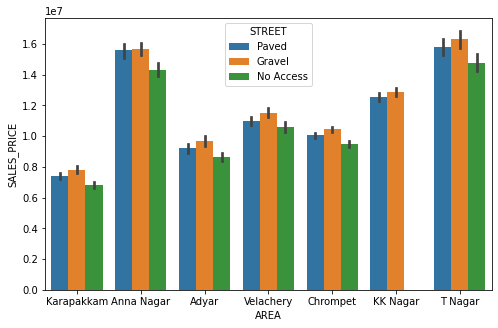

In [186]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x='AREA',y='SALES_PRICE' ,data=df, hue='STREET')
plt.show()

In [187]:
df.drop(['SALE_COND','DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS'], axis=1, inplace=True)

In [188]:
df.head()

AREA  INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM PARK_FACIL   BUILDTYPE  \
0  Karapakkam      1004          1           1       3        Yes  Commercial   
1  Anna Nagar      1986          2           1       5         No  Commercial   
2       Adyar       909          1           1       3        Yes  Commercial   
3   Velachery      1855          3           2       5         No      Others   
4  Karapakkam      1226          1           1       3        Yes      Others   

  UTILITY_AVAIL  STREET MZZONE  SALES_PRICE  AGE_YEARS  
0        AllPub   Paved      A      7600000         43  
1        AllPub  Gravel     RH     21717770         11  
2           ELO  Gravel     RL     13159200         19  
3        NoSeWa   Paved      I      9630290         22  
4        AllPub  Gravel      C      7406250         29

**Label Encoding**

In [189]:
dfnew = df.copy()

In [190]:
dfnew['AREA'] = dfnew['AREA'].map({'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KK Nagar':4, 'Anna Nagar': 5, 'T Nagar':6})
dfnew['UTILITY_AVAIL'] = dfnew['UTILITY_AVAIL'].map({'ELO':0, 'NoSeWa':1, 'AllPub':2})
dfnew['STREET'] = dfnew['STREET'].map({'No Access':0, 'Paved':1, 'Gravel':2 })
dfnew['MZZONE'] = dfnew['MZZONE'].map({'A':0, 'C':1, 'I':2, 'RH':4, 'RL':5, 'RM':6})
dfnew['PARK_FACIL'] = dfnew['PARK_FACIL'].map({'Yes':1, 'No':0})
dfnew['BUILDTYPE'] = dfnew['BUILDTYPE'].map({'Commercial':0,'House':1, 'Others':2})

In [191]:
dfnew.to_csv('cleaned_HousePredictions.csv')

In [192]:
dfnew.head()

AREA  INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  PARK_FACIL  BUILDTYPE  \
0     0      1004          1           1       3           1          0   
1     5      1986          2           1       5           0          0   
2     1       909          1           1       3           1          0   
3     3      1855          3           2       5           0          2   
4     0      1226          1           1       3           1          2   

   UTILITY_AVAIL  STREET  MZZONE  SALES_PRICE  AGE_YEARS  
0              2       1       0      7600000         43  
1              2       2       4     21717770         11  
2              0       2       5     13159200         19  
3              1       1       2      9630290         22  
4              2       2       1      7406250         29

**Model Building and Evaluation**

**Linear Regression**

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [194]:
input_x = ['AREA', 'INT_SQFT','N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE_YEARS','BUILDTYPE']

In [195]:
X = dfnew[input_x].values
y = dfnew['SALES_PRICE'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [196]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5644, 11) (1412, 11) (5644, 1) (1412, 1)


In [197]:
f1 = StandardScaler()
f1.fit(X_train)
X_train_stand = f1.transform(X_train) 
X_test_stand = f1.transform(X_test)

In [198]:
m1 = LinearRegression()
m1.fit(X_train_stand,Y_train)
print("Intercept:{} ,Coefficients:{}".format(m1.intercept_, m1.coef_))
print(m1.score(X_train_stand,Y_train))
print(m1.score(X_test_stand,Y_test))

Intercept:[10892671.56715096] ,Coefficients:[[ 1029966.23461015   745640.1191529  -1276771.75214521    56755.29626598
   1722747.5148805    521189.57928279    70230.08815648   376209.68481922
    863036.95205853  -225598.85894874 -1600873.27473714]]
0.8056076952775411
0.8038966015536646


In [199]:
mean_absolute_error(Y_test, m1.predict(X_test_stand))

1346137.221299371

In [200]:
y_pred = m1.predict(X_test_stand)
y_pred

array([[ 9737796.68565958],
       [12222548.10159543],
       [10471621.73559875],
       ...,
       [ 6106054.49323543],
       [10257906.17349022],
       [11005111.29986423]])

In [201]:
print('R2- SCORE:', metrics.r2_score(Y_test,y_pred))

R2- SCORE: 0.8038966015536646


**DecisionTree**

In [202]:
from sklearn.tree import DecisionTreeRegressor

In [203]:
input_cols = ['AREA', 'INT_SQFT','N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE_YEARS','BUILDTYPE']

In [204]:
X = dfnew[input_cols].values
Y = dfnew['SALES_PRICE'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5644, 11) (1412, 11) (5644, 1) (1412, 1)


In [205]:
model = DecisionTreeRegressor()
model.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

1.0
0.9731204697788404


In [206]:
model = DecisionTreeRegressor()
model.fit(X_train_stand,Y_train)
print(model.score(X_train_stand,Y_train))
print(model.score(X_test_stand,Y_test))

1.0
0.9737327649746146


**RandomForest Regressor**

In [207]:
from sklearn.ensemble import RandomForestRegressor

In [208]:
input_cols = ['AREA', 'INT_SQFT','N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE_YEARS',
       'BUILDTYPE']

In [209]:
X = dfnew[input_cols].values
Y = dfnew['SALES_PRICE'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5644, 11) (1412, 11) (5644, 1) (1412, 1)


In [210]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9984581383692991
0.9888395622620798


Finally we got conclusion that the 'AREA', 'AGE_YEARS' and 'SQFT' plays important role in the house price.